<h1 align="center"><b>AI Lab: Computer Vision and NLP</b></h1>
<h3 align="center">Exercise 03: Digits Classification with Scikit Learn</h3>

---

For this exercise, we'll use a dataset which was used when dealing with the first **C**onvolutional **N**eural **N**etwork (**CNN**): the dataset of the digits. We'll use the dataset contained in `scikit-learn`:

In [116]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

First, let's load the dataset:

In [117]:
digits = load_digits()

# We can print the number of samples that we have and their size. The format is
# (Number of images, Width of the images, Height of the images, Number of channels of the images)
print(digits.images.shape)

(1797, 8, 8)


Notice how we have only grayscale images: we don't have a 4th item in the shape tuple. We can try to plot some of the numbers:

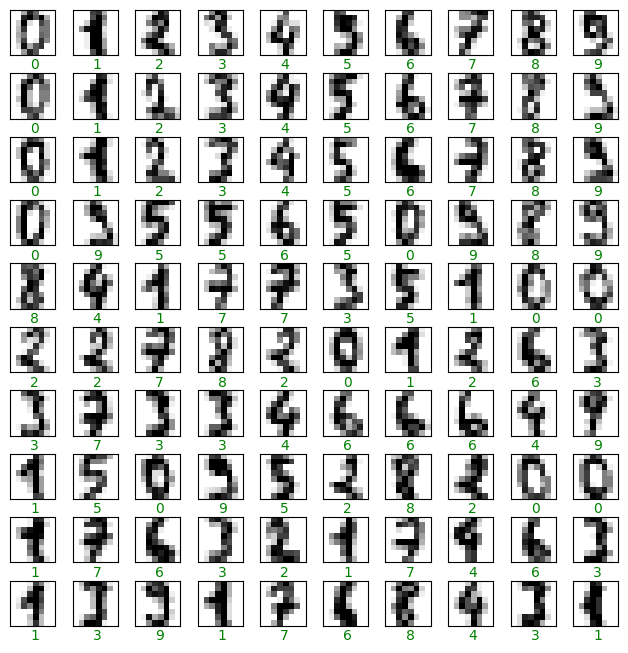

In [118]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={"xticks": [], "yticks": []}, gridspec_kw=dict(hspace=0.4, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary")
    ax.text(3.05, 10, str(digits.target[i]), color="green")

plt.show()

Let us now get the data needed for the training model:

In [119]:
X = digits.data
Y = digits.target

We can now proceed to split the data, create a model, train it and see the results:

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.8)

Now, let us create a Gaussian model:

In [121]:
model = GaussianNB()

Now it's possible to train the model with the `fit()` method:

In [122]:
model.fit(X_train, Y_train)

GaussianNB()

We can now use the model on new data and compute the accuracy score with `accuracy_score()`:

In [123]:
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(acc)

0.825


In order to detect some possible flaws in our model, we can use the `confusion_matrix` metric, which can be imported from `scikit-learn`:

In [124]:
mat = confusion_matrix(Y_test, Y_pred)

Let's now plot our results:

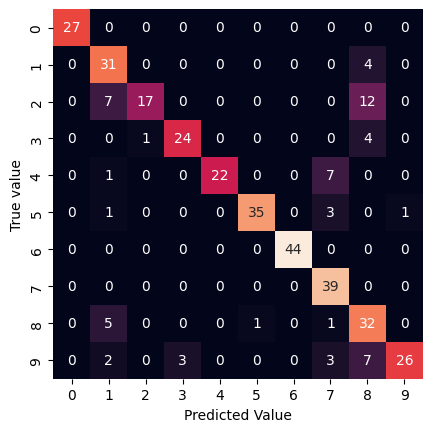

In [125]:
sns.heatmap(mat, square=True, annot=True, cbar=False)

plt.xlabel("Predicted Value")
plt.ylabel("True value")

plt.show()